In [63]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from pandas.plotting._matplotlib import scatter_matrix
from scipy.optimize import linprog
from scipy.spatial.qhull import ConvexHull
from sklearn.decomposition import PCA
##accessing columns| ndarray[:,col_i]
##accessing rows   | ndarray[row_i,:]

In [64]:
def plot(X, Y, t, labels=("Features","Target")):
   # plt.figure(figsize=(x_dim,y_dim))
    plt.scatter(X, Y, c = ['b','tr'])
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
   # plt.plot(X, pred, color='blue', linewidth=3)
    plt.show()
def plot_scatter_matrix(dataframe):
    scatter_matrix(dataframe, figsize=(15,11))

SyntaxError: non-default argument follows default argument (<ipython-input-64-53882460d244>, line 1)

In [ ]:
features = np.genfromtxt('pca_ex.csv', delimiter=',')
target = np.genfromtxt('classes.txt', delimiter=' ')
df_f = pandas.read_csv('pca_ex.csv',header=0, names= ["X1","X2","X3"])
df_t = pandas.read_csv('classes.txt', sep=" ", header=None).transpose()
df_f['Target'] = pandas.DataFrame(df_t)
print(df_f)
X1 = features[:,0]
X2 = features[:,1]
X3 = features[:,2]
print(features.shape)
print(len(features[0]))
print(target.shape)

In [ ]:
def lin_checker(i_X,j_X,labels=("Features","Target")):
    plt.figure(figsize = (10, 6))
    names = [0,1]
    colors = ['b','r']
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    for i in range(len(names)):
        bucket = df_f[df_f['Target'] == i]
        bucket = bucket.iloc[:,[i_X-1,j_X-1]].values
        hull = ConvexHull(bucket)
        plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
        for j in hull.simplices:
            plt.plot(bucket[j,0], bucket[j,1], colors[i])
    plt.show()

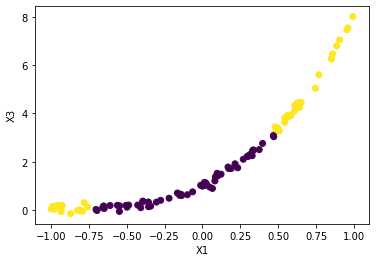

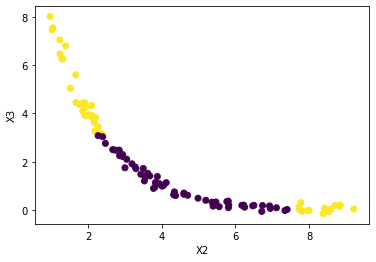

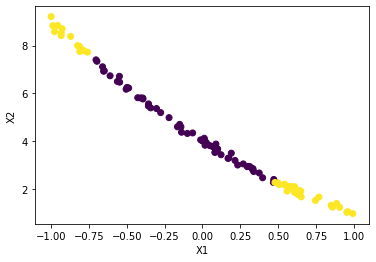

In [67]:
# lin_checker(1, 3, ["X1", "X3"])
# lin_checker(2, 3, ["X2", "X3"])
# lin_checker(1, 2, ["X1", "X2"])

plot(X1, X3, ["X1", "X3"])
plot(X2, X3, ["X2", "X3"])
plot(X1, X2, ["X1", "X2"])

Variance ratio for 1st and 2nd pc:  [0.92269554 0.07725761]
Directions [[ 0.18329411 -0.73532064  0.65246213]
 [-0.07819712  0.65069767  0.75529977]]


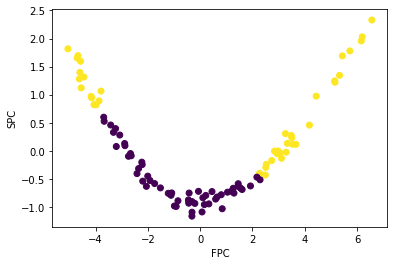

In [65]:
pca = PCA(n_components=2).fit(features)
pca_features = pca.transform(features)
print("Variance ratio for 1st and 2nd pc: ",pca.explained_variance_ratio_)
print("Directions", pca.components_)
plot(pca_features[:,0],pca_features[:,1], ["FPC", "SPC"])
df_f['FPC'] = pandas.DataFrame(pca_features[:,0])
df_f['SPC'] = pandas.DataFrame(pca_features[:,1])
#lin_checker(5,6,["FPC","SPC"])